# Reading and Visualizing Metrica Data

This example shows how to perform the most basic operations with OOPitch: reading tracking data and visualizing it. At this early stage, the only data provider supported is Metrica.

We will use publicly available Metrica data.

In [1]:
# At the moment the code is still not built as a Python package. 
# Therefore, we have to go to the right folder to import the desired file.
import os
import pandas as pd
os.chdir('../')
# Read_metrica is the only function we need to import for this example
from OOP_io import read_metrica

## The `Match` Object

Metrica data for a match is composed of at least three sources: 

1. A home team tracking data set;
2. An away team tracking data set;
3. An event data set.

The function `read_metrica()` needs the location of these three data sets as its `home_path`, `away_path`, `events_path` arguments, respectively. The location can also be a publicly-accessible url. The `read_metrica()` function will create a `Match` object, containing all necessary information for analysis.

We will use the data that Metrica anonymized and made publicly available on their GitHub (https://github.com/metrica-sports/sample-data). See also the tutorials by Laurie Shaw (@eightfivepoint) on the same data set (https://github.com/Friends-of-Tracking-Data-FoTD/LaurieOnTracking), on which some of this code is based.

In [2]:
# Get the path to the event and tracking data set.
# Here, we load the data directly from the Metrica GitHub
event_url = 'https://raw.githubusercontent.com/metrica-sports/sample-data/master/data/Sample_Game_2/Sample_Game_2_RawEventsData.csv'
home_tracking_url = 'https://raw.githubusercontent.com/metrica-sports/sample-data/master/data/Sample_Game_2/Sample_Game_2_RawTrackingData_Home_Team.csv'
away_tracking_url = 'https://raw.githubusercontent.com/metrica-sports/sample-data/master/data/Sample_Game_2/Sample_Game_2_RawTrackingData_Away_Team.csv'
# The match object will contain all the information we need for the analysis
# This command will take few minutes to run
match = read_metrica(home_path=home_tracking_url, away_path=away_tracking_url, events_path=event_url)

Reading team: home
Creating Point objects for ball
Creating Point objects for home_11
Creating Point objects for home_1
Creating Point objects for home_2
Creating Point objects for home_3
Creating Point objects for home_4
Creating Point objects for home_5
Creating Point objects for home_6
Creating Point objects for home_7
Creating Point objects for home_8
Creating Point objects for home_9
Creating Point objects for home_10
Creating Point objects for home_12
Creating Point objects for home_13
Creating Point objects for home_14
Reading team: away
Creating Point objects for away_25
Creating Point objects for away_15
Creating Point objects for away_16
Creating Point objects for away_17
Creating Point objects for away_18
Creating Point objects for away_19
Creating Point objects for away_20
Creating Point objects for away_21
Creating Point objects for away_22
Creating Point objects for away_23
Creating Point objects for away_24
Creating Point objects for away_26
Read events data


The object `match` now contains all the information we need for the analysis. Specifically, it contains the following:

1. `match['events']` gives access to the event data;
2. `match['home_11']` provide you access to a `Player` ("home_11", in this case) and all its tracking information;
3. `match['ball']` provides the `Ball` object, which contains the tracking data for the ball.
4. `match.pitch` contains information on the pitch, like its dimension.

We will explore these part of `match` below. 

#### Events

The `match` object contains the event of the match, as presented in the original Metrica data: `match['events']` will return a `pandas.DataFrame` containing the Metrica event data. As an example, let's focus on the first goal.

In [3]:
# Get the event DataFrame
events = match['events']
# 'ON TARGET-GOAL' and 'HEAD-ON TARGET-GOAL' are the Metrica events signaling goals
goals = events.loc[events['Subtype'].isin(['ON TARGET-GOAL', 'HEAD-ON TARGET-GOAL'])]
# We only focus on the first goal
goal = goals.iloc[0]
# When did the goal happen?
first_goal_frame = goal['End Frame']
print(f"First goal happened at frame {first_goal_frame}")
# Index of the first goal in the event DataFrame
first_goal_index = goals.index[0]
print(f"It is event number {first_goal_index} in the game")

First goal happened at frame 12212
It is event number 198 in the game


We can visualize what happened in different ways. First, we can focus and visualize on the *events* leading to the goal. We can do this with `match.plot_events()`. It is sufficient to pass the indices of the events we want to plot. We will also set `annotate=True`, since it helps to understand what happens.

(<Figure size 864x576 with 1 Axes>, <AxesSubplot:>)

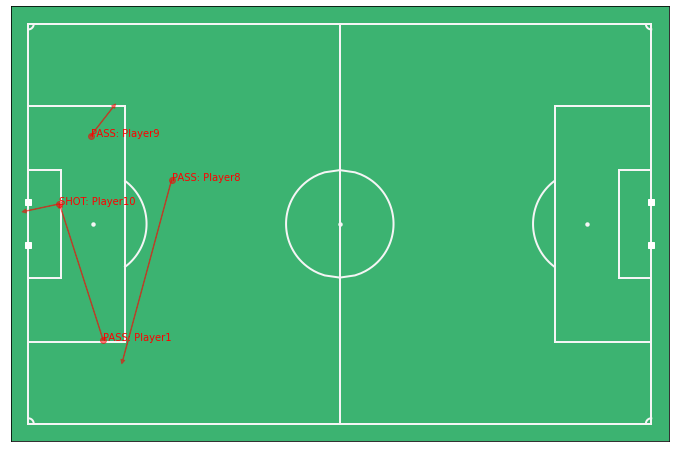

In [4]:
# We will plot the three events leading to the first goal. As it turns out, they are passages.
match.plot_events(range(first_goal_index-3, first_goal_index+1), annotate=True)

Event visualization is helpful, but we lack an understanding of the positions of the players on the pitch. We can get that by visualizing a single frame. For example, the passage from 'Player8' -- events number 196 -- seems key for changing the play to the left wing, whereas the action started on the right. This probably means the defense was not following 'Player1' very closely.

We can check all this by plotting the frame when the passage was executed. The function `match.plot_frame()` will do this for us.

TEAM: home
TEAM: away


(<Figure size 864x576 with 1 Axes>, <AxesSubplot:>)

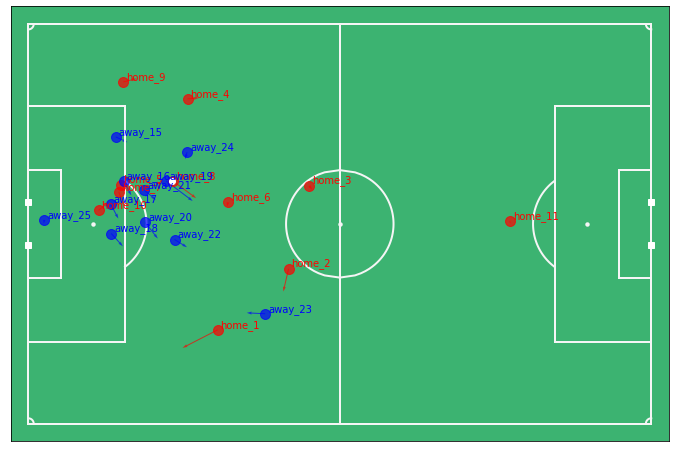

In [5]:
# Get the passage frame
passage_frame = events.loc[196, 'Start Frame']
# Plot a single frame from the data, with all the players.
# We specify that we want their speed visualized as a vector
# We also ask for player id through 'annotate=True'
match.plot_frame(passage_frame, include_player_velocities=True, annotate=True)
# home_1 is in a lot of space indeed

There is a little discrepancy in the way player are indicated in the functions `match.plot_frame()` and `match.plot_events()`: the same player is indicated with `home_1` and `player1`, respectively. I am working on solving this issue, which is due to a little discrepancy in the way players are referred to in the Metrica data itself. 

Obviously, a single frame is not easy to read. Through the function `match.save_match_clip()`, the `match` object can save animation files (in wm4 format) showing what happens in entire sequences.  When you call this function, `sequence` is a `list` (or any other iterable) containing the frames that will be plotted, `fpath` is the path to the folder that will contain the animation file, `fname` is the name of the file -- the extension will be automatically added if not already in the file name. We will save the 10 seconds before the goal. Since Metrica data is taken 25 times per second, this means the clip will start 250 frames before the end of the shot.

In [6]:
# Save the clip through save_match_clip()
frames_in_the_clip = range(first_goal_frame-250, first_goal_frame+1)
match.save_match_clip(sequence=frames_in_the_clip, fpath='.', fname='goal')

Generating movie...done


This lines generate the clip you can find in this folder.

#### Pitch

Next, let's check the `match.pitch`.

These are the dimensions of the pitch: (106.0, 68.0)


(<Figure size 864x576 with 1 Axes>, <AxesSubplot:>)

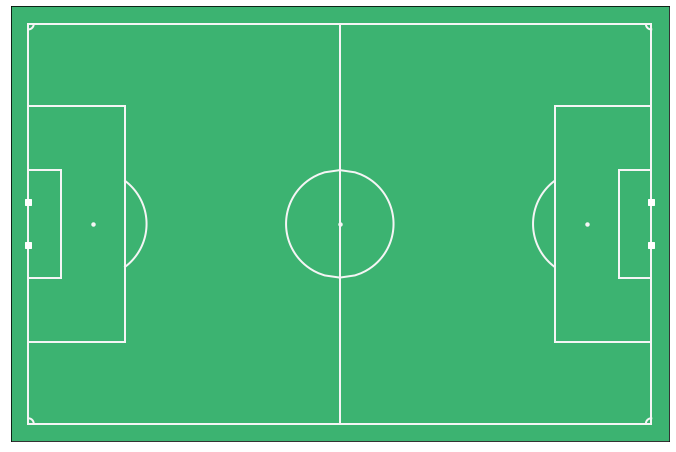

In [7]:
# match.pitch contains the relevant information on the pitch
# for example, dimensions in meters
print(f"These are the dimensions of the pitch: {match.pitch.dimension}")
# We can also plot the pitch
match.pitch.plot()

Plotting the pitch is the first step in many visualizations. Therefore, `match.pitch.plot()` returns a `matplotlib` `Figure` and `Axes` object. This function can be used to create personalized, advanced visuals.

Now something a little more technical. For many data analysis techniques we need to compute a continous function over the surface of the pitch. In practice, we approximate the function by dividing the pitch in smaller pieces -- which we call "sub-pitches" in OOPitch. The division of `match.pitch` in sub-pitches happens automatically when loading the data. We can check the area of a sub-pitch (in meter squared) and plot the division.

This is the area of a sub-pitch: 4.368


(<Figure size 864x576 with 1 Axes>, <AxesSubplot:>)

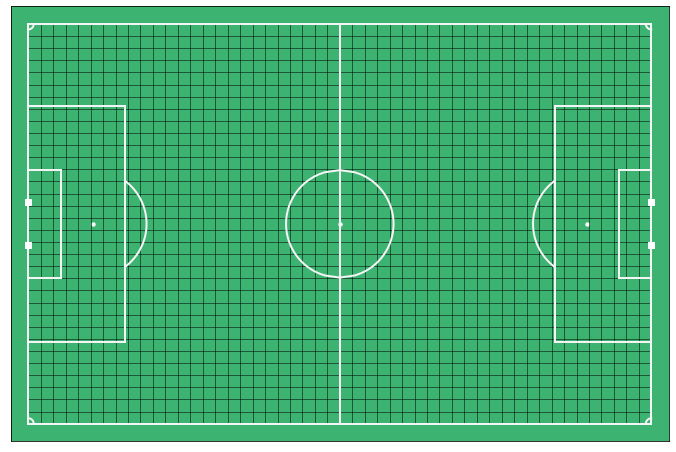

In [8]:
# We can extract the sub_pitch_area
print(f"This is the area of a sub-pitch: {match.pitch.sub_pitch_area}") 
# We can also plot the division
match.pitch.plot(grid=True, grid_alpha=0.3)

#### Players

The tracking data of every player is available from the match object. The object calculates the players' velocity and total distance covered for us. It also infers who the goalkeepers are in each team.

Let us compare the home goalkeeper with a field player.

The goalkeeper for team home is home_11
The goalkeeper for team away is away_25
         max_speed   distance
home_1   10.489777  10.465868
home_11   9.953195   5.268125


<AxesSubplot:>

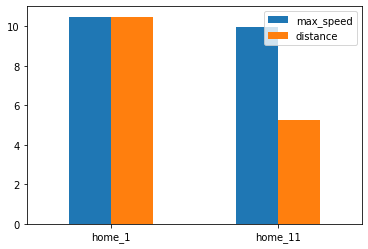

In [9]:
# Who are the goalkeepers?
gks = {}
for team, gk in match.GKs.items():
    gks[team] = gk
    print(f"The goalkeeper for team {team} is {gk}")
# Let's focus on the home goalkeeper ('home_11') as opposed to 'home_1'
# Match automatically calculates total distance covered and velocity at each frame
players = ['home_1', 'home_11']
# These are the distances covered by the two players
total_distances = [match[player].total_distance for player in players]
# These are their maximum speed during the match
max_speed = [match[player].velocity['speed'].max() for player in players]
# Let's put distances and speed into a pandas DataSet and plot them
comparison = pd.DataFrame(pd.DataFrame({'max_speed':max_speed, 'distance':total_distances}, index = players))
# The distance covered is in meters, let's put that in kilometers
comparison['distance'] = comparison['distance']/1000
print(comparison)
# Simple plot of the two players' feature
comparison.plot.bar(rot=0)

Without using the slower `match.save_match_clip()` function, it is very simple to plot the position of one or more players during the match during frame sequence. Let's check the position of 'home_1' and its direct opponent 'away_18', who is the right back who is supposed to mark 'home_1' during the goal action.

(<Figure size 864x576 with 1 Axes>, <AxesSubplot:>)

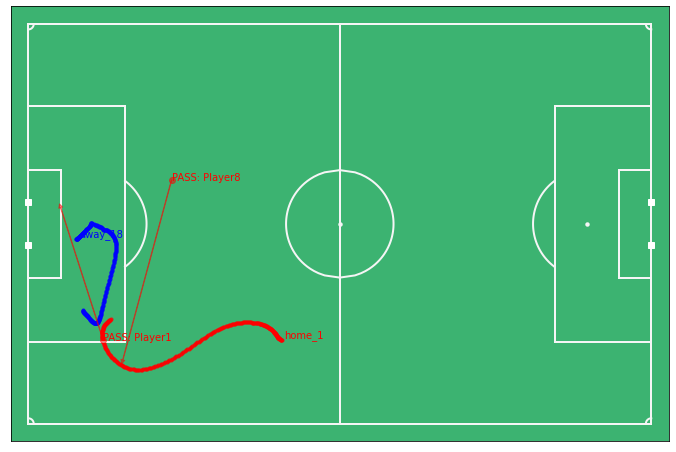

In [10]:
# Here we will use the match.pitch.plot() to create a background for the visual
fig, ax = match.pitch.plot()
# Then we plot the position of home_1 during the goal action
# we pass the figure and axis object just created
match['home_1'].plot(frames_in_the_clip, figax=(fig, ax))
match['away_18'].plot(frames_in_the_clip, figax=(fig, ax), color='blue')
# It is also useful to plot the events where home_1 received and then crossed the ball
# This helps to follow what happens with the ball
# We can pass the same fig, ax to add this layer to our plot
match.plot_events((196,197), figax=(fig, ax), annotate=True)